In [2]:
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import fsolve
import numpy as np
from src.copula_integration import equilibrium_solve, func_mx, func_y, acop
import pandas as pd
import math
from src.wage_integrals import mass_wage_sector, equilibrium_xs, beta_part, equilibrium_solve, summer
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import cm
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

# Plot separating equilibrium

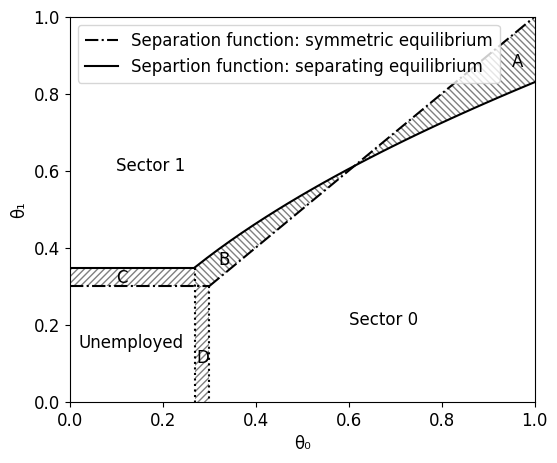

In [2]:
# Plot describing equilibria for different values of the correlation parameter and AMH copula
d = np.arange(0.3, 1.05, 0.025)
dd = np.arange(0.27, 1.05, 0.025)
ddd = np.arange(0.27, 0.31, 0.01)
dddd = np.arange(0, 0.271, 0.01)
ddddd = np.arange(0.27, 0.31, 0.01)
fig, ax = plt.subplots(figsize=(6, 5))


for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)

def f1(x):
    return x
def f2(x):
    return x**(0.5)-0.17

vecfunc1 = np.vectorize(f1)
ax.plot(d,vecfunc1(d), label='Separation function: symmetric equilibrium',linestyle='dashdot',color='black')

vecfunc2 = np.vectorize(f2)
ax.plot(dd,vecfunc2(dd), label='Separtion function: separating equilibrium',color='black')
plt.plot([0, 0.3], [0.3, 0.3], color='black',linestyle='dashdot')
plt.plot([0.3, 0.3], [0.3, 0],color='black', linestyle='dotted')
plt.plot([0, 0.27], [(0.3**(0.5)-0.2), (0.3**(0.5)-0.2)],color='black')
plt.plot([0.27, 0.27], [(0.3**(0.5)-0.2), 0],color='black', linestyle='dotted')
plt.text(0.02, 0.14, 'Unemployed', fontsize=12)
plt.text(0.1, 0.6, 'Sector 1', fontsize=12)
plt.text(0.6, 0.2, 'Sector 0', fontsize=12)
plt.text(0.95, 0.87, 'A', fontsize=12)
plt.text(0.32, 0.355, 'B', fontsize=12)
plt.text(0.1, 0.31, 'C', fontsize=12)
plt.text(0.2723, 0.1, 'D', fontsize=12)
ax.set_ylim([0, 1])
ax.set_xlim([0, 1])
ax.set_xlabel('θ0'.translate(subscript))
ax.set_ylabel('θ1'.translate(subscript))
ax.legend(loc='upper left',prop={'size': 12})
plt.fill_between(d, f1(d), f2(d), where=f1(d)>=f2(d), interpolate=True,color="none", hatch="\\\\\\\\\\", edgecolor="grey", linewidth=0.0,alpha=1)
plt.fill_between(d, f1(d), f2(d), where=f1(d)<=f2(d), interpolate=True,color="none", hatch="\\\\\\\\\\", edgecolor="grey", linewidth=0.0,alpha=1)
plt.fill_between(ddd, 0.3, f2(ddd), where=0.27<=f2(ddd), interpolate=True,color="none", hatch="\\\\\\\\\\", edgecolor="grey", linewidth=0.0,alpha=1)
plt.fill_between(dddd, 0.3, 0.35, interpolate=True,color="none", hatch="/////", edgecolor="grey", linewidth=0.0,alpha=1)
plt.fill_between(ddddd, 0, 0.3, interpolate=True,color="none", hatch="/////", edgecolor="grey", linewidth=0.0,alpha=1)
plt.savefig('isf.pdf')

# Showing of actual separating equilibria

In [3]:
normd = 1
kappa = 0.5
xx = equilibrium_solve([0.45, 0.67, 0.1], kappa, normd)

In [4]:
normd = 1
kappa = 0.7
#newton_krylov(lambda k: func_x(k)-k,  [0])
xx2 = equilibrium_solve([0.4, 0.7, 0.15], kappa, normd)

In [8]:
out1 = pd.DataFrame([xx])
out2 = pd.DataFrame([xx2])
out1.to_pickle("eq1")
out2.to_pickle("eq2")  

In [3]:
xx = pd.read_pickle("eq1")
xx2 = pd.read_pickle("eq2")

In [4]:
#Check condition for comparative static result
normd = 1
kappa = 0.7
y = func_mx(xx.x[0][0],xx.x[0][1],xx.x[0][2], kappa, normd),
func_y(xx.x[0][0]/xx.x[0][1],xx.x[0][2], kappa, normd), func_y(y[0][0]/y[0][1],xx.x[0][2], kappa, normd)

((0.5000000000278255, 0.4999999999611757),
 (0.4411136460378532, 0.5588863539346323))

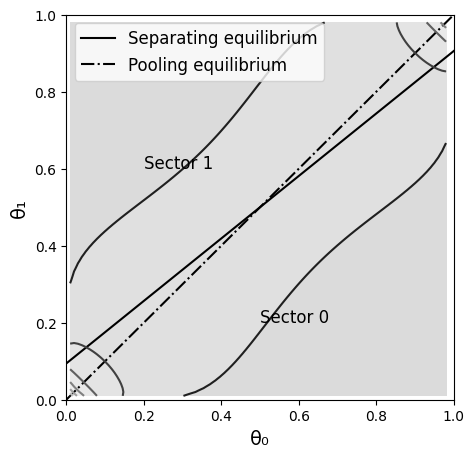

In [5]:
# Contour plot and equilibria distributions Gaussian copula ρ = 0.5
kappa = 0.5
k = xx.x[0][0]/xx.x[0][1]
m = xx.x[0][2]



fig, ax = plt.subplots(figsize=(5, 5))
d = np.arange(0, 1, 0.001)
vecfunc = np.vectorize(lambda x: (x-(1-k)/2)/k)
vecfunc2 = np.vectorize(lambda x: x)
x = np.arange(0.01,0.99,0.01)
y = np.arange(0.01,0.99,0.01)
X, Y = np.meshgrid(x,y)


zs = []
for i in np.arange(0.01,0.99,0.01):
    for j in np.arange(0.01,0.99,0.01):
        zs.append(acop(i,j,kappa,normd))
zs = np.array(zs)
Z = zs.reshape(X.shape)
ax.contourf(X, Y, Z, cmap=plt.cm.gray,alpha=0.15)



ax.plot(vecfunc(d),d,label='Separating equilibrium',color='black')
vecfunc2 = np.vectorize(lambda x: x)
ax.plot(d,vecfunc2(d), label='Pooling equilibrium',linestyle='dashdot',color='black')
ax.set_ylim([0, 1])
ax.set_xlim([0, 1])
ax.set_xlabel('θ0'.translate(subscript))
ax.set_ylabel('θ1'.translate(subscript))
ax.legend(loc='upper left',prop={'size': 12})
plt.text(0.2, 0.6, 'Sector 1', fontsize=12)
plt.text(0.5, 0.2, 'Sector 0', fontsize=12)
for item in ([ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(14)    
plt.contour(X,Y,Z)
plt.gray()
#plt.suptitle("Skill separation in competitive equilibria") 
plt.savefig('eqsepss05.pdf')

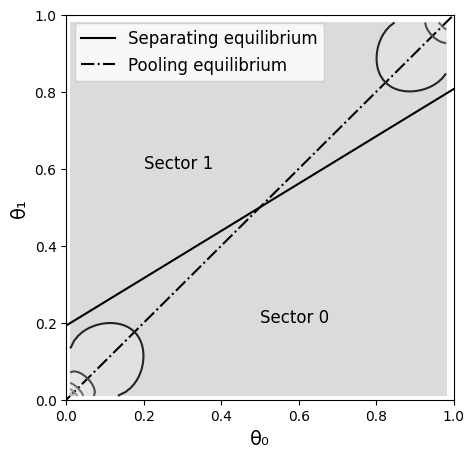

In [6]:
# Contour plot and equilibria distributions Gaussian copula ρ=0.7
kappa = 0.7
k = xx2.x[0][0]/xx2.x[0][1]
m = xx2.x[0][2]

fig, ax = plt.subplots(figsize=(5, 5))
d = np.arange(0, 1, 0.001)
vecfunc = np.vectorize(lambda x: (x-(1-k)/2)/k)
vecfunc2 = np.vectorize(lambda x: x)
x = np.arange(0.01,0.99,0.01)
y = np.arange(0.01,0.99,0.01)
X, Y = np.meshgrid(x,y)


zs = []
for i in np.arange(0.01,0.99,0.01):
    for j in np.arange(0.01,0.99,0.01):
        zs.append(acop(i,j,kappa,normd))
zs = np.array(zs)
Z = zs.reshape(X.shape)
ax.contourf(X, Y, Z, cmap=plt.cm.gray,alpha=0.15)



ax.plot(vecfunc(d),d,label='Separating equilibrium',color='black')
vecfunc2 = np.vectorize(lambda x: x)
ax.plot(d,vecfunc2(d), label='Pooling equilibrium',linestyle='dashdot',color='black')
ax.set_ylim([0, 1])
ax.set_xlim([0, 1])
ax.set_xlabel('θ0'.translate(subscript))
ax.set_ylabel('θ1'.translate(subscript))
ax.legend(loc='upper left',prop={'size': 12})
plt.text(0.2, 0.6, 'Sector 1', fontsize=12)
plt.text(0.5, 0.2, 'Sector 0', fontsize=12)
for item in ([ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(14)    
plt.contour(X,Y,Z)
plt.gray()
#plt.suptitle("Skill separation in competitive equilibria") 
plt.savefig('eqsepss.pdf')

# Plotting wage distributions

In [ ]:
normd = 1
eqk = np.array([])
for i in [0,1,2]:
    if i==0:
        γ = 1
        kappa = 0.8
        σ= 1
    elif i==1:
        γ = 1
        kappa = 0.85
        σ= math.sqrt(x**2+0.8)
    elif i==2:
        γ = 1
        kappa = 0.85
        σ= 1
    eqk = np.append(eqk,equilibrium_solve([0.65,0.45,0.1]))
eqk
out1 = pd.DataFrame(eqk)
out1.to_pickle("eqks_csfinal")

In [2]:
dff = pd.read_pickle("eqks_csfinal")
a=dff[0].apply(pd.Series)

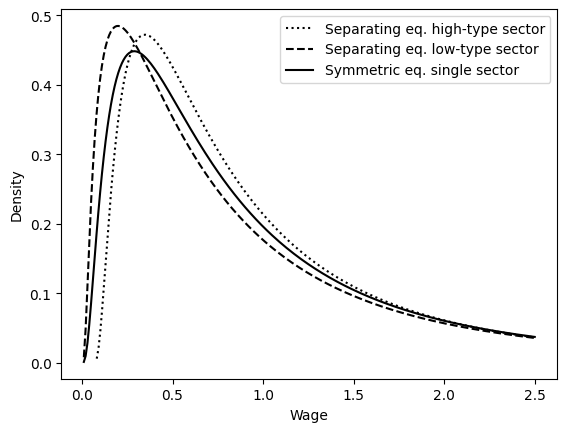

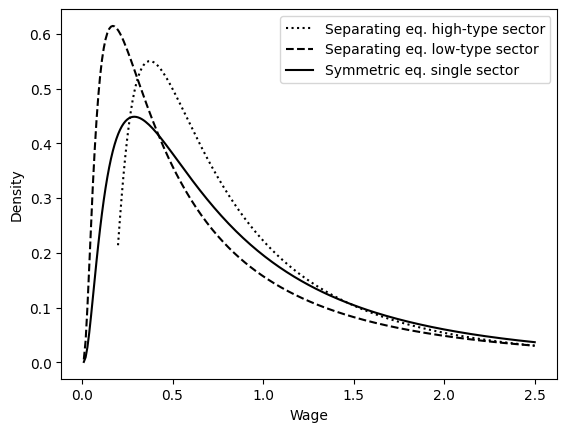

In [3]:
#Plotting wage distributions
for i in [0,2]:
    if i == 0:
        kappa = 0.8
        σ = 1
        γ = 1
    elif i == 1:
        kappa = 0.85
        γ = 1
        σ = 1
        
    x_0, x_1, C = a[0:3].x[i]
    x = a[0:3].x[i][0:2]
    x_sym = equilibrium_xs(1,1,0, kappa)[0:2]
    
    d_low = np.arange(beta_part(x_0)+0.01, 2.5, 0.01)
    d_high = np.arange(C +beta_part(x_0)+0.01, 2.5, 0.01)
    d_med = np.arange(0.01+beta_part(x_sym[0]), 2.5, 0.01)
   
    low_wage = np.vectorize(lambda θ: mass_wage_sector(x,θ,C,0, kappa))(d_low)
    high_wage = np.vectorize(lambda θ: mass_wage_sector(x,θ,C,1, kappa))(d_high)
    med_wage = np.vectorize(lambda θ: mass_wage_sector(x_sym,θ,0,0, kappa))(d_med)

    fig, ax = plt.subplots()

    ax.plot(d_high,high_wage, label='Separating eq. high-type sector', color='black', linestyle='dotted')
    ax.plot(d_low,low_wage, label='Separating eq. low-type sector', color='black', linestyle='dashed')
    ax.plot(d_med,med_wage, label='Symmetric eq. single sector', color='black')

    plt.legend()
    #plt.title('Wage distributions in different eq')
    plt.xlabel('Wage')
    plt.ylabel('Density')
    plt.savefig('wd' + f'{str(i)}' +'final.pdf')    

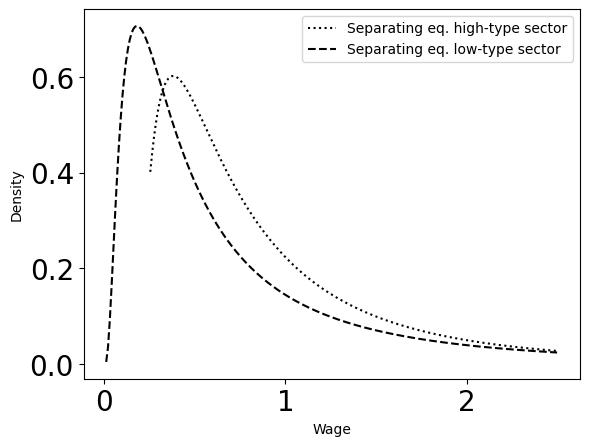

In [11]:
#Plotting wage distributions asym
kappa = 0.85


        
x_0, x_1, C = a[0:3].x[1]
x = a[0:3].x[1][0:2]
d_low = np.arange(beta_part(x_0)+0.01, 2.5, 0.01)
d_high = np.arange(C +beta_part(x_0)+0.01, 2.5, 0.01)
    

low_wage = np.vectorize(lambda θ: mass_wage_sector(x,θ,C,0, kappa))(d_low)
high_wage = np.vectorize(lambda θ: mass_wage_sector(x,θ,C,1, kappa))(d_high)
    
fig, ax = plt.subplots()

ax.plot(d_high,high_wage, label='Separating eq. high-type sector', color='black', linestyle='dotted')
ax.plot(d_low,low_wage, label='Separating eq. low-type sector', color='black', linestyle='dashed')


plt.legend()
#plt.title('Wage distributions in different eq')
plt.xlabel('Wage')
plt.ylabel('Density')
plt.savefig('wd1final.pdf')    

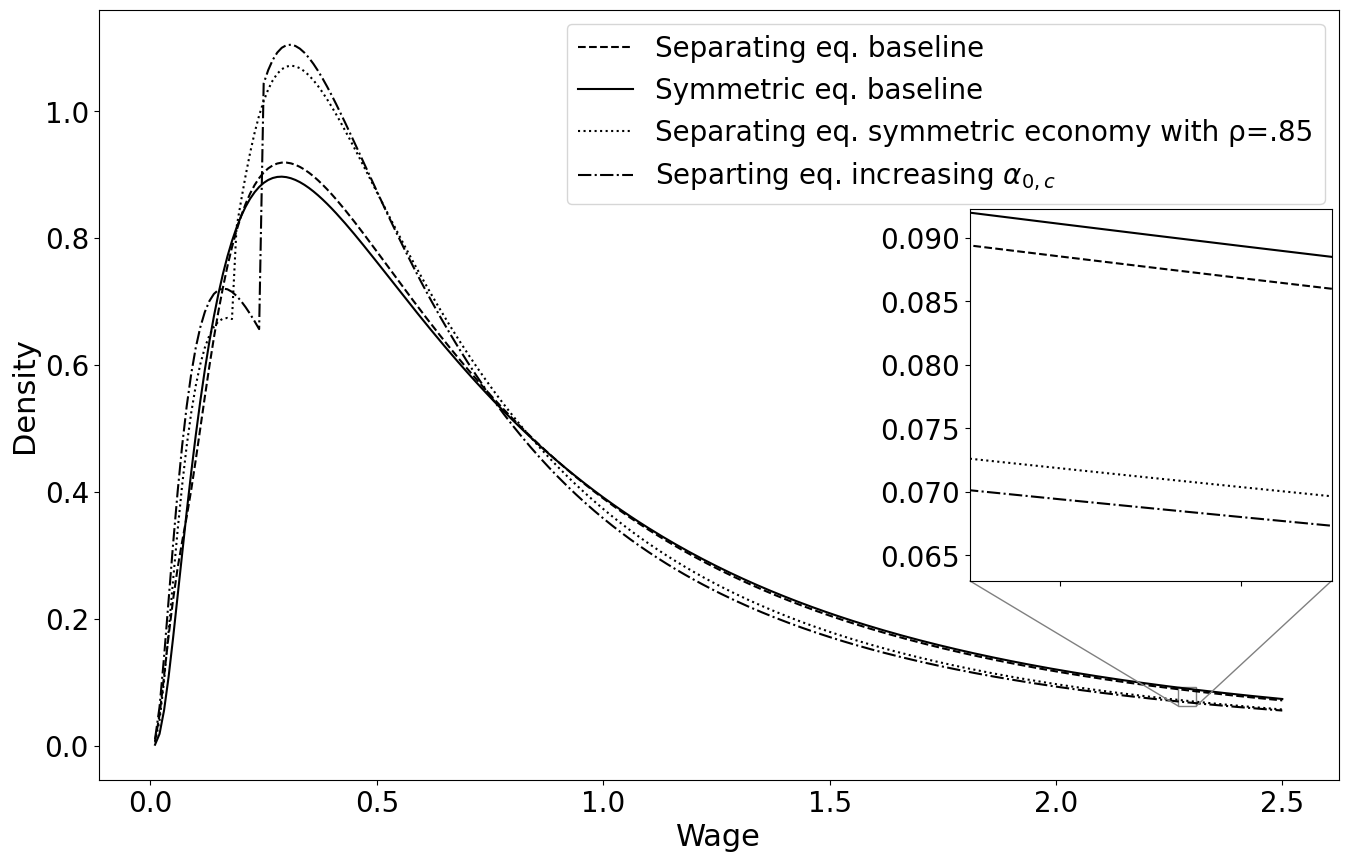

In [17]:

string =r'Separting eq. increasing $α_{0,c}$'
kappa = 0.8
γ = 1
normd = 1
σ = 1
x_0, x_1, C = a[0:3].x[0]
x = a[0:3].x[0][0:2]
x_sym =equilibrium_xs(1,1,0,kappa)[0:2]
d_low = np.arange(beta_part(x_0)+0.01, 2.5, 0.01)

sum_wage = np.vectorize(lambda θ: summer(x,θ,C,σ,kappa))(d_low)
med_wage = np.vectorize(lambda θ: mass_wage_sector(x_sym,θ,0,0, kappa))(d_low)
sum_med_wage = 2*med_wage

fig, ax = plt.subplots(figsize=(16, 10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
ax.plot(d_low,sum_wage, label='Separating eq. baseline' ,color='black', linestyle='dashed')
ax.plot(d_low,sum_med_wage, label='Symmetric eq. baseline',color='black')

kappa = 0.85
x_0, x_1, C = a[0:3].x[2]
x = a[0:3].x[2][0:2]

sum_wage_2 = np.vectorize(lambda θ: summer(x,θ,C,σ,kappa))(d_low)


ax.plot(d_low,sum_wage_2, label='Separating eq. symmetric economy with ρ=.85',color='black', linestyle='dotted')

ab = fsolve(lambda x: (x*math.sqrt(0.8)+0.4)/math.sqrt(x**2+0.8)-0.85,  0.3)
x = ab[0]
σ = math.sqrt(x**2+0.8)
x_0, x_1, C = a[0:3].x[1]
x = a[0:3].x[1][0:2]

sum_wage_3 = np.vectorize(lambda θ: summer(x,θ,C,σ,kappa))(d_low)


ax.plot(d_low,sum_wage_3, label=string, color='black', linestyle='dashdot')


plt.legend(fontsize=20)
plt.xlabel('Wage', size=22)
plt.ylabel('Density', size=22)

axins = zoomed_inset_axes(ax, 20, loc=7)
axins.plot(d_low,sum_wage,color='black', linestyle='dashed')
axins.plot(d_low,sum_med_wage, color='black')
axins.plot(d_low,sum_wage_2, linestyle='dotted',color='black')
axins.plot(d_low,sum_wage_3, linestyle='dashdot',color='black')

# sub region of the original image
x1, x2, y1, y2 = 2.27, 2.31, 0.063, 0.0923
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

plt.xticks(visible=False)
#plt.yticks(visible=False)
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")
#plt.title('Total wage distributions in different eq')

plt.savefig('twd2.pdf')

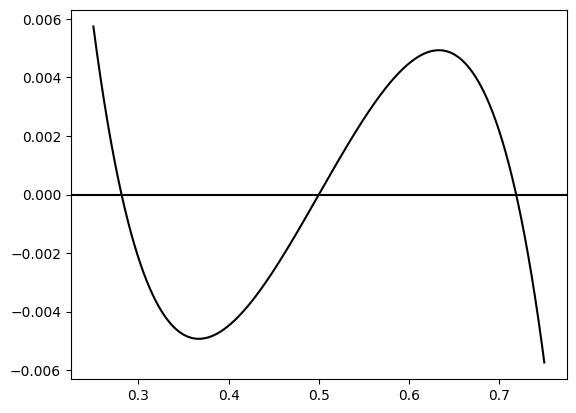

In [28]:
def agg_surplus_func(x,sig=0.45,gam=4,y=0):
    p1 = x**(1-2*sig)
    gg = (gam-1)/gam
    dp1 = (1-2*sig)*x**(-2*sig)*(p1**(-1/(gam-1))*gg+x-y)
    dp2 = p1*(1-(1-2*sig)*(1/gam)*x**(-(1-2*sig)/(gam-1)-1))
    return dp1+dp2
def leet(x):
    return agg_surplus_func(x)-agg_surplus_func(1-x)
d = np.arange(1/4, 3/4, 0.00001)
vecfunc = np.vectorize(leet)
T = vecfunc(d)
plt.plot (d, T, 'k')

plt.axhline(y=0, c="k", label="y=0")
plt.show()

In [31]:
from scipy.optimize import least_squares
least_squares(lambda x: agg_surplus_func(x)-agg_surplus_func(1-x),  [1.2/4], bounds=[[1/4],[3/4]])

     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-9.671e-08]
           x: [ 2.812e-01]
        cost: 4.676409345079261e-15
         jac: [[-1.380e-01]]
        grad: [ 1.334e-08]
  optimality: 4.16591776121221e-10
 active_mask: [0]
        nfev: 4
        njev: 4

# Micro foundations examples

In [3]:
meanb = integrate.quad(lambda x: x, 1, 2 )[0] * 2 / 3 + integrate.quad(lambda x: x, 0, 1)[0] * 1 / 3
means = integrate.quad(lambda x: x, 1, 2 )[0] * 1 / 3 + integrate.quad(lambda x: x, 0, 1)[0] * 2 / 3
varb = integrate.quad(lambda x: x**2, 1, 2 )[0] * 2 / 3 + integrate.quad(lambda x: x**2, 0, 1)[0] * 1 / 3
varss = integrate.quad(lambda x: x**2, 1, 2 )[0] * 1 / 3 + integrate.quad(lambda x: x**2, 0, 1)[0] * 2 / 3

meanb2 = integrate.quad(lambda x: x, 1, 2 )[0] * 3 / 4 + integrate.quad(lambda x: x, 0, 1)[0] * 1 / 4
means2 = integrate.quad(lambda x: x, 1, 2 )[0] * 1 / 4 + integrate.quad(lambda x: x, 0, 1)[0] * 3 / 4
varb2 = integrate.quad(lambda x: x**2, 1, 2 )[0] * 3 / 4 + integrate.quad(lambda x: x**2, 0, 1)[0] * 1 / 4
vars2 = integrate.quad(lambda x: x**2, 1, 2 )[0] * 1 / 4 + integrate.quad(lambda x: x**2, 0, 1)[0] * 3 / 4

mean_var = (1.5,28/12)

In [5]:
def  c_solve(c,xi,sigma,gamma):
    lhs = c**gamma + c**(gamma-1)*xi[0]
    rhs = (c*xi[0]+xi[1])**(1-sigma)
    return lhs - rhs

In [25]:
xi = [(0.5,1/3, 'fully separated'),(1,4/3, 'pooling'), (means,varss,'small separation'), (meanb,varb, 'big separation')]
sigma = [0.5, 0.8 ,1, 2]
gamma = [1.5, 1.8, 2]  

solutions = []
j=1
for s in sigma:
    for g in gamma:
        for x in xi:
            sol = fsolve(lambda c: c_solve(c, x, s, g),  0.9)
            solutions.append({'s': s, 'g': g, 'x': x[2], 'combination': f'$gamma={g}$, $sigma={s}$', 'sol':sol[0]})
            
# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(solutions)

# Pivot the DataFrame to get the desired table structure
table = df.pivot(index='x', columns=['combination'], values='sol')

# Convert NaN values to empty strings
table = table.fillna('')


# Get the total number of columns
total_columns = table.shape[1]

# Calculate the index to split the columns into two halves
split_index = total_columns // 2

# Split the DataFrame into two halves
df_half1 = table.iloc[:, :split_index]
df_half2 = table.iloc[:, split_index:2*split_index]

# Generate LaTeX code for the table
latex_code1 = df_half1.to_latex()
latex_code2 = df_half2.to_latex()


# Print LaTeX code
print(latex_code1)
print(latex_code2)


\begin{tabular}{lrrrrrr}
\toprule
combination &  \$gamma=1.5\$, \$sigma=0.5\$ &  \$gamma=1.5\$, \$sigma=0.8\$ &  \$gamma=1.5\$, \$sigma=1\$ &  \$gamma=1.5\$, \$sigma=2\$ &  \$gamma=1.8\$, \$sigma=0.5\$ &  \$gamma=1.8\$, \$sigma=0.8\$ \\
x                &                           &                           &                         &                         &                           &                           \\
\midrule
big separation   &                  0.708897 &                  0.498621 &                0.404892 &                0.163721 &                  0.784504 &                  0.606618 \\
fully separated  &                  0.551112 &                  0.644651 &                0.697429 &                0.879422 &                  0.647588 &                  0.714812 \\
pooling          &                  0.702414 &                  0.541264 &                0.465571 &                0.253064 &                  0.777257 &                  0.639021 \\
small separation &

/tmp/ipykernel_19194/969671855.py:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code1 = df_half1.to_latex()
/tmp/ipykernel_19194/969671855.py:35: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code2 = df_half2.to_latex()


In [6]:
xi = [(0.5,1/3, 'fully separated'),(1,4/3, 'pooling'), (means,varss,'small separation'), (meanb,varb, 'big separation')]
sigma = [0.5, 0.6, 0.8, 1, 1.5, 2, 4, 8, 25]
gamma = [1.5, 1.6, 1.8, 2, 2.5, 3, 5, 10, 25] 
data = []
for s in sigma:
    for g in gamma:
        for x in xi:
            c = fsolve(lambda c: c_solve(c, x, s, g),  0.9)[0]
            ag1 = c**(g-1) * x[0] + ((g-1) / g) * c**g
            if x == xi[0]:
                y = mean_var
                sol = fsolve(lambda c: c_solve(c, y, s, g),  0.9)[0]
            elif x == xi[2]:
                y = (means2,vars2)
                sol = fsolve(lambda c: c_solve(c, y, s, g),  0.9)[0]
            elif x == xi[3]:
                y = (meanb2,varb2)
                sol = fsolve(lambda c: c_solve(c, y, s, g),  0.9)[0]
            else:
                y = x
                sol = c
                
            ag2 = sol**(g-1) * y[0] + ((g-1) / g) * sol**g
            
            data.append({'agg_surplus' : ag1+ag2, 'comb' :f'g={g}, s={s}', 'X_i': x[2]})
            
df = pd.DataFrame(data)

df_piv = df.pivot(index='comb', columns='X_i', values='agg_surplus')
df_piv.to_csv("df_piv.csv")

/tmp/ipykernel_19194/1630984347.py:2: RuntimeWarning: invalid value encountered in power
  lhs = c**gamma + c**(gamma-1)*xi[0]
/tmp/ipykernel_19194/1630984347.py:2: RuntimeWarning: invalid value encountered in sqrt
  lhs = c**gamma + c**(gamma-1)*xi[0]
/home/peter/miniconda3/envs/denv/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [55]:
def calculate_percentage_difference(row):
    # Find the column with the maximum value
    max_col = row.idxmax()

    # Get the maximum value
    max_value = row[max_col]

    # Exclude the winning column from the comparison
    other_columns = row.drop(max_col)

    # Find the closest value to the maximum in the row
    closest_col = min(other_columns.index, key=lambda col: abs(other_columns[col] - max_value))

    # Calculate the percentage difference
    percentage_difference = ((row[closest_col] - max_value) / max_value) * 100

    # Return the result as a dictionary
    result = {
        'max_column': max_col,
        'closest_column': closest_col,
        'percentage_difference': percentage_difference
    }

    return result

# Apply the function to each row in the DataFrame
result_df = df_piv.apply(calculate_percentage_difference, axis=1, result_type='expand')

# Display the result DataFrame
result_df.to_csv("results.csv")

In [7]:
# Check for a given value of gamma and sigma.
gamma = 1.5
sigma = 2
clist = []
solo = []
for x in xi:
    c = fsolve(lambda c: c_solve(c, x, sigma,gamma),  0.9)[0]
    clist.append(c)
    ag1 = c**(gamma-1) * x[0] + ((gamma-1) /gamma) * c**gamma
    if x == xi[0]:
        y = mean_var
        sol = fsolve(lambda c: c_solve(c, y, sigma,gamma),  0.9)[0]
    elif x == xi[2]:
        y = (means2, vars2)
        sol = fsolve(lambda c: c_solve(c, y, sigma,gamma),  0.9)[0]
    elif x == xi[3]:
        y = (meanb2, varb2)
        sol = fsolve(lambda c: c_solve(c, y, sigma,gamma),  0.9)[0]
    else:
        y = x
        sol = c
                
    ag2 = sol**(gamma-1) * y[0] + ((gamma-1) /gamma) * sol**gamma
    solo.append(ag1+ag2)

In [8]:
solo

[1.142333242653074, 1.0909786677357305, 1.2217270142347634, 0.9630312426601977]

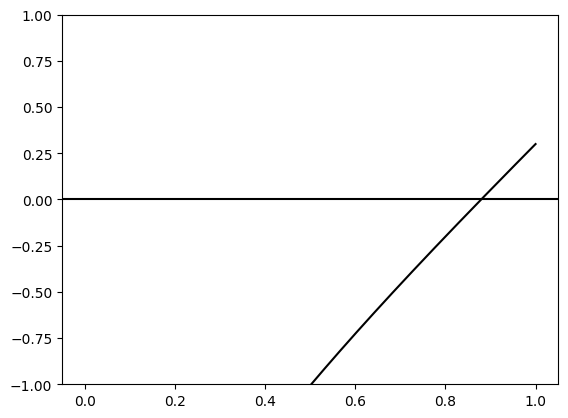

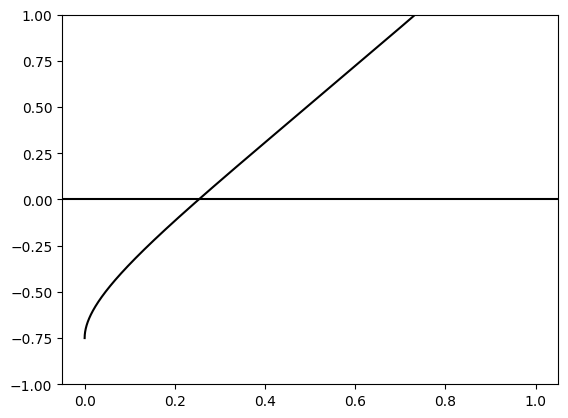

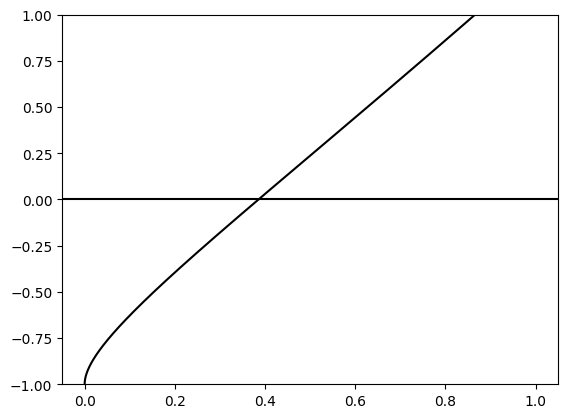

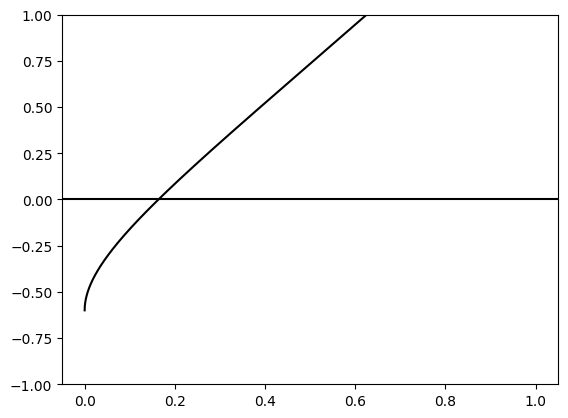

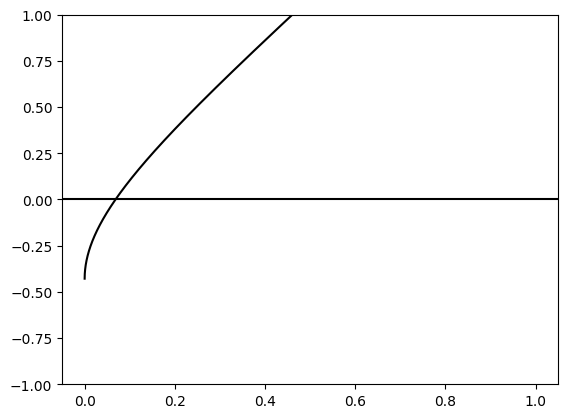

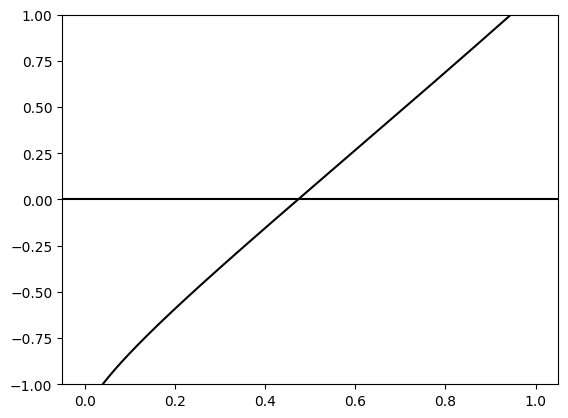

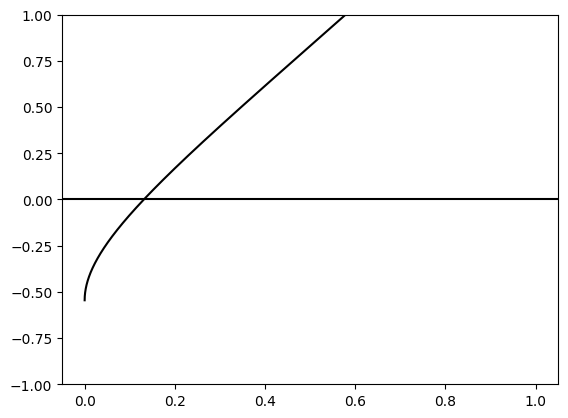

In [24]:
#Plotting a lot of c-functions to determine whether there are multiple solutions
d = np.arange(0, 1, 0.00001)
xi = [(0.5,1/3, 'fully separated'),(1,4/3, 'pooling'), (means,varss,'small separation'), (meanb,varb, 'big separation'), (1.5,28/12, 'fs_high'), (means2,vars2,'small separation'), (meanb2,varb2, 'big separation')]
sigma = [2]
gamma = [1.5]  

for s in sigma:
    for g in gamma:
        for x in xi:
            vecfunc = np.vectorize(lambda c: c_solve(c, x, s, g))
            T = vecfunc(d)
            plt.plot (d, T, 'k')
            plt.ylim([-1,1])
            plt.axhline(y=0, c="k", label="y=0")
            plt.show()

# Misc

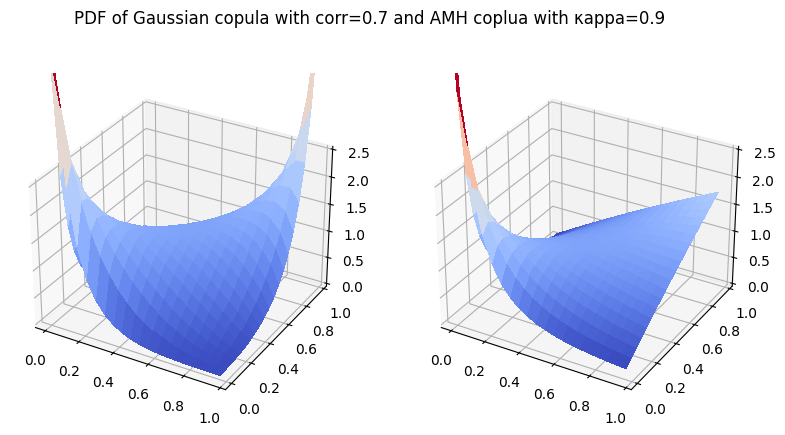

In [ ]:
#3D plot of pdf of Gaussian and AMH copula
normd =1
kappa =0.7

fig = plt.figure(figsize=plt.figaspect(0.5))

#Create grid and multivariate normal
x = np.arange(0.01,0.99,0.05)
y = np.arange(0.01,0.99,0.05)
X, Y = np.meshgrid(x,y)

ax = fig.add_subplot(1, 2, 1, projection='3d')

zs = []
for i in np.arange(0.01,0.99,0.05):
    for j in np.arange(0.01,0.99,0.05):
        zs.append(acop(i,j,kappa,normd))
zs = np.array(zs)
Z = zs.reshape(X.shape)

#Make a 3D plot


ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


ax.set_zlim([0, 2.5])



normd =0
kappa =0.9

ax = fig.add_subplot(1, 2, 2, projection='3d')

#Create grid and multivariate normal
zs = np.array(acop(np.ravel(X), np.ravel(Y), kappa, normd))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


ax.set_zlim([0, 2.5])
plt.suptitle("PDF of Gaussian copula with corr=0.7 and AMH coplua with κappa=0.9") 

plt.savefig('pdf3d.png')

In [ ]:
i = 0
xi = [(0.5,1/3),(1,4/3),(1.5,28/12)]
sigma = [0.5,1,2,4,8,25]
gamma = [1.5,2,3,5,10,25] 
ags = []
for s in sigma:
    for g in gamma:
        for x in xi:
            c = solutions[i]
            ag1 = c**(g-1) * x[0] + ((g-1) / g) * c**g
            if x == xi[0]:
                y = xi[2]
                sol = fsolve(lambda c: c_solve(c, y, s, g),  0.9)
            elif x == xi[2]:
                y = xi[0]
                sol = fsolve(lambda c: c_solve(c, y, s, g),  0.9)
            else:
                y = x
                sol = fsolve(lambda c: c_solve(c, y, s, g),  0.9)
            ag2 = sol**(g-1) * y[0] + ((g-1) / g) * sol**g
            ags.append(ag1+ag2)
            i+=1

/tmp/ipykernel_12457/2373798361.py:6: RuntimeWarning: invalid value encountered in power
  lhs = c**gamma + c**(gamma-1)*xi[0]
/tmp/ipykernel_12457/2373798361.py:6: RuntimeWarning: invalid value encountered in sqrt
  lhs = c**gamma + c**(gamma-1)*xi[0]
/home/peter/miniconda3/envs/denv/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
